In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import itertools
from time import sleep
import os
import seaborn as sns
from itertools import chain

In [2]:
# If it doesn't run, get this DF from BuildDotaMatches
# to get FeaturesOfResidualMatches from goodAnomaliesResidual
df = pd.read_csv('data/FeaturesOfResidualMatches.csv')

In [3]:
df2 = pd.DataFrame(np.loadtxt('data/goodAnomaliesResidual.csv', delimiter = ','), 
                 columns = ["match_id", "residual"])

df = df.merge(df2, left_on='match_id', right_on='match_id')

matchDictionary = {}
heroColumns = [filter(lambda x: z in x, df.columns) for z in ['hero_id']][0]

# for each row, this function will return all the heroes that the match belongs in
# for example, if the match had an AM and Spectre, we should place this match in each of those bags
def heroesForMatch(row):
    pass

In [4]:
df = df[~df['match_id'].duplicated()]

In [5]:
df = df.sort_values(by='residual', ascending=False)

In [6]:
columns = df.columns
numericalFeatures = ['match_id', 'positive_votes', 'negative_votes', 'first_blood_time', 'radiant_win',
                    'duration', 'kills', 'deaths', 'assists', 'apm', 'kpm', 'kda', 'hero_dmg',
                    'gpm', 'hero_heal', 'xpm', 'totalgold', 'totalxp', 'lasthits', 'denies',
                    'tower_kills', 'courier_kills', 'gold_spent', 'observer_uses', 'sentry_uses',
                    'ancient_kills', 'neutral_kills', 'camps_stacked', 'pings', 'rune_pickups', 'residual']
numFeatures = [filter(lambda x: z in x, columns) for z in numericalFeatures]
numFeatures = list(chain(*numFeatures))
df = df[numFeatures]

In [7]:
df['match_id'].values.tolist()

[3123855360,
 3123250944,
 3123103488,
 3123836672,
 3123892992,
 3123652352,
 3123873280,
 3123800064,
 3123906560,
 3123271936,
 3123164928,
 3123730176,
 3123365632,
 3123386368,
 3123863552,
 3123284224,
 3123681280,
 3123471104,
 3123589888,
 3123843584,
 3123658752,
 3123094016,
 3123779328,
 3123324416,
 3123481088,
 3123864576,
 3122994688,
 3123663360,
 3123467776,
 3123057408,
 3123854080,
 3123095552,
 3123882496,
 3123486720,
 3123088384,
 3123927040,
 3123254784,
 3122996992,
 3123304704,
 3123404544,
 3123678976,
 3123429376,
 3123045888,
 3123207424,
 3123770624,
 3123082240,
 3123564288,
 3123057664,
 3123794688,
 3122989568,
 3123667200,
 3123067392,
 3123003904,
 3123871232,
 3123542016,
 3123043072,
 3123352576,
 3123351808,
 3123910912,
 3123553024,
 3123449344,
 3123789056,
 3123555584,
 3123015936,
 3123028736,
 3123625216,
 3123068416,
 3123666688,
 3123352064,
 3123194368,
 3123256576,
 3123582976,
 3123028992,
 3123513088,
 3123577344,
 3122989056,
 3123261440,

In [8]:
df['residual'].values.tolist()

[21.432130813598633,
 21.23417091369629,
 21.1313533782959,
 20.924365997314453,
 20.322521209716797,
 20.135805130004883,
 18.312454223632812,
 18.2866268157959,
 17.769739151000977,
 17.649425506591797,
 16.933002471923828,
 16.63404083251953,
 16.43926429748535,
 16.420900344848633,
 16.36215591430664,
 16.211353302001953,
 15.81419849395752,
 15.667449951171875,
 15.630619049072266,
 15.470060348510742,
 15.118217468261719,
 14.945989608764648,
 14.812270164489746,
 14.770950317382812,
 14.720905303955078,
 14.700338363647461,
 14.65152645111084,
 14.547149658203125,
 14.521434783935547,
 14.210748672485352,
 14.179040908813477,
 14.168844223022461,
 14.103372573852539,
 14.036528587341309,
 13.981718063354492,
 13.953973770141602,
 13.840815544128418,
 13.821186065673828,
 13.74673080444336,
 13.483569145202637,
 13.472919464111328,
 13.453269004821777,
 13.433164596557617,
 13.40774917602539,
 13.182275772094727,
 13.1610689163208,
 13.118196487426758,
 13.103710174560547,
 13.09

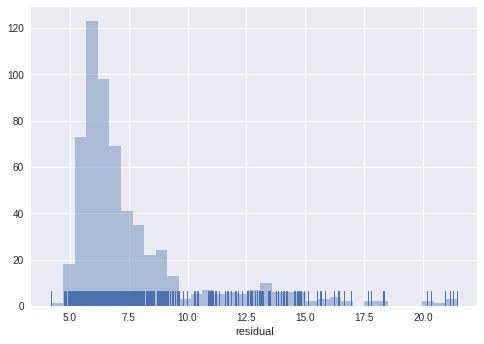

In [9]:
sns.distplot(df['residual'],  kde=False, rug=True)
plt.show()

In [10]:
len(df)

604

In [11]:
plt.close()

In [12]:
residuals = df['residual'].values.tolist()

In [13]:
np.max(residuals) - np.min(residuals)

17.203261375427246

In [14]:
df['residual']

487    21.432131
250    21.234171
96     21.131353
196    20.924366
415    20.322521
332    20.135805
168    18.312454
254    18.286627
21     17.769739
592    17.649426
49     16.933002
421    16.634041
94     16.439264
53     16.420900
284    16.362156
101    16.211353
360    15.814198
223    15.667450
40     15.630619
183    15.470060
431    15.118217
528    14.945990
290    14.812270
539    14.770950
470    14.720905
534    14.700338
518    14.651526
349    14.547150
47     14.521435
568    14.210749
         ...    
19      5.284157
187     5.273058
451     5.258973
432     5.254524
392     5.252199
285     5.249025
256     5.244771
411     5.236786
381     5.233667
98      5.222927
569     5.215235
156     5.201863
370     5.189620
439     5.125827
501     5.109166
574     5.100806
345     5.092525
35      5.087733
602     5.069938
429     5.064404
93      5.018312
36      5.002108
18      4.989084
482     4.965495
547     4.933017
17      4.926008
209     4.844563
434     4.7857

In [15]:
def RadiantDireDifference(row, column):
    faction = ['radiant', 'dire']
    poss = ['pos1', 'pos2', 'pos3', 'pos4', 'pos5']
    radiantSum = 0
    direSum = 0
    for pos in poss:
        radiantSum += row['radiant_'+ pos + '_' + column]
        direSum += row['dire_'+ pos + '_' + column]
    return radiantSum - direSum

def reject_outliers(data, m=1.5):
    return abs(data - np.mean(data)) < m * np.std(data)


def heroKDAdeficit(row):
    faction = ['radiant', 'dire']
    poss = ['pos1', 'pos2', 'pos3', 'pos4', 'pos5']
    largestAbsoluteSoFar = -1
    returnVal = -1
    for pos in poss:
        for fac in faction:
            value = row[fac + '_' + pos + '_kills'] + \
                        row[fac + '_' + pos + '_assists'] - \
                        row[fac + '_' + pos + '_deaths']
            if abs(value) >= largestAbsoluteSoFar:
                largestAbsoluteSoFar = abs(value)
                returnVal = value
    return returnVal

def heroKDdeficit(row):
    faction = ['radiant', 'dire']
    poss = ['pos1', 'pos2', 'pos3', 'pos4', 'pos5']
    largestAbsoluteSoFar = -1
    returnVal = -1
    for pos in poss:
        for fac in faction:
            value = row[fac + '_' + pos + '_kills'] - \
                        row[fac + '_' + pos + '_deaths']
            if abs(value) >= largestAbsoluteSoFar:
                largestAbsoluteSoFar = abs(value)
                returnVal = value
    return returnVal

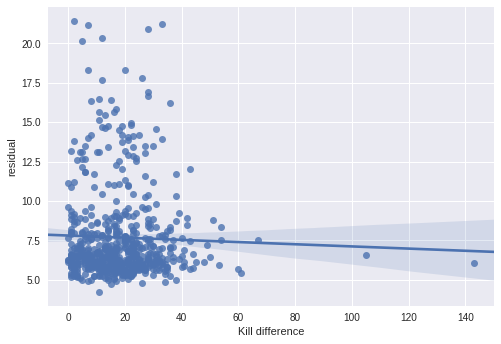

In [16]:
kill_difference = np.abs(df.apply(RadiantDireDifference, args=('kills',), axis=1))
sns.regplot(kill_difference, df['residual'])
ax = plt.gca()
ax.set_xlabel("Kill difference")
plt.show()

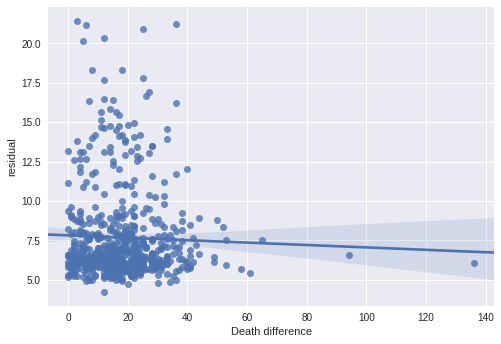

In [17]:
death_difference = df.apply(RadiantDireDifference, args=('deaths',), axis=1)
sns.regplot(np.abs(death_difference), df['residual'])
ax = plt.gca()
ax.set_xlabel("Death difference")
plt.show()

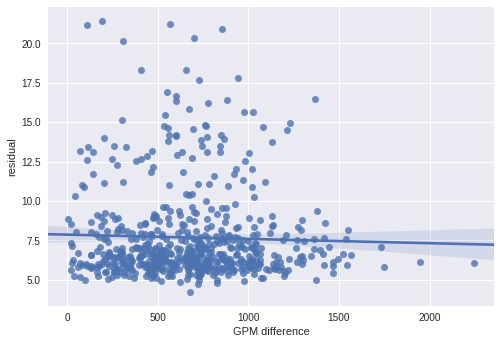

In [18]:
gold_difference = df.apply(RadiantDireDifference, args=('gpm',), axis=1)
sns.regplot(np.abs(gold_difference), df['residual'])
ax = plt.gca()
ax.set_xlabel("GPM difference")
plt.show()

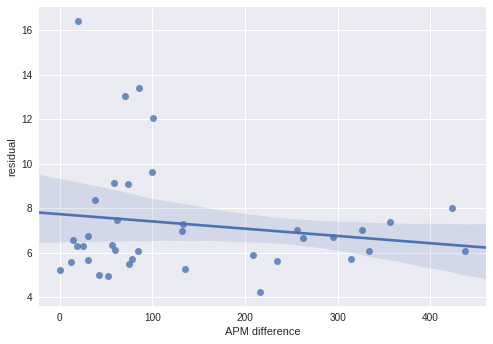

In [19]:
apm_difference = df.apply(RadiantDireDifference, args=('apm',), axis=1)
sns.regplot(np.abs(apm_difference), df['residual'])
ax = plt.gca()
ax.set_xlabel("APM difference")
plt.show()

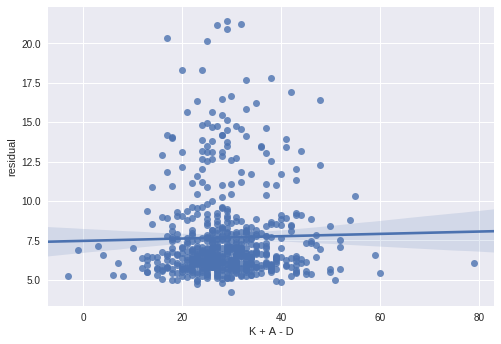

In [20]:
kda = df.apply(heroKDAdeficit, axis=1)
sns.regplot(kda, df['residual'])
ax = plt.gca()
ax.set_xlabel("K + A - D")
plt.show()

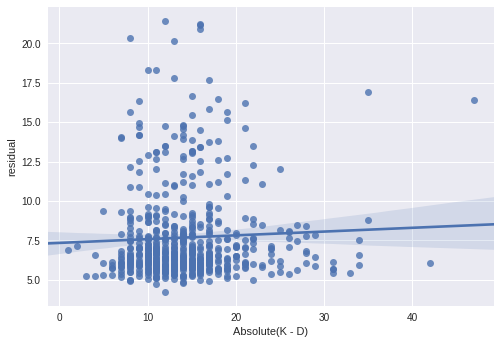

In [21]:
kd = df.apply(heroKDdeficit, axis=1)
sns.regplot(np.abs(kd), df['residual'])
ax = plt.gca()
ax.set_xlabel("Absolute(K - D)")
plt.show()

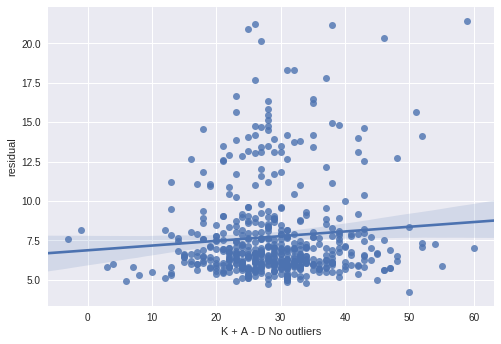

In [22]:
kda = df.apply(heroKDAdeficit, axis=1)
kda_mean = np.mean(kda)
kda_std = np.std(kda)
indices = np.where(np.logical_and(kda <= kda_mean + 1.5*kda_std, kda >= kda_mean-1.5*kda_std))[0]
sns.regplot(kda[indices], df['residual'].iloc[indices])
ax = plt.gca()
ax.set_xlabel("K + A - D No outliers")
plt.show()

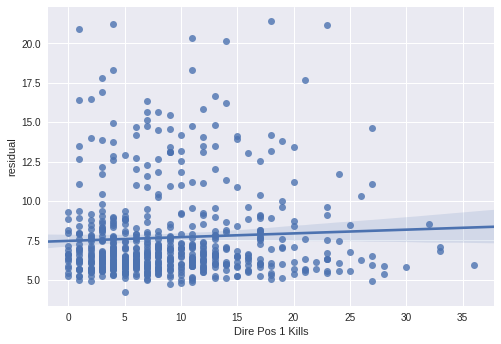

In [23]:
sns.regplot(df['dire_pos1_kills'], df['residual'])
ax = plt.gca()
ax.set_xlabel("Dire Pos 1 Kills")
plt.show()

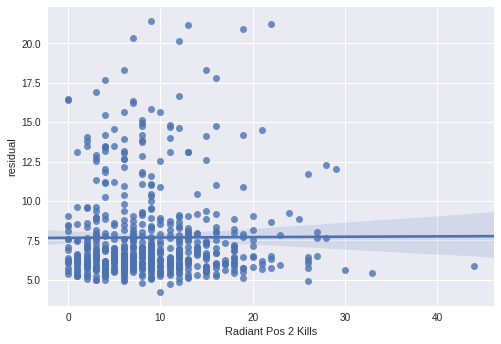

In [24]:
sns.regplot(df['radiant_pos2_kills'], df['residual'])
ax = plt.gca()
ax.set_xlabel("Radiant Pos 2 Kills")
plt.show()

In [25]:
df[df['residual'] > 17]

,match_id,positive_votes,negative_votes,first_blood_time,radiant_win,duration,dire_pos1_ancient_kills,dire_pos1_courier_kills,dire_pos1_kills,dire_pos1_neutral_kills,...,dire_pos2_rune_pickups,dire_pos3_rune_pickups,dire_pos4_rune_pickups,dire_pos5_rune_pickups,radiant_pos1_rune_pickups,radiant_pos2_rune_pickups,radiant_pos3_rune_pickups,radiant_pos4_rune_pickups,radiant_pos5_rune_pickups,residual
487,3123855360,0,0,151,False,2994,NaN,NaN,18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.432131
250,3123250944,0,0,9,True,2109,NaN,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.234171
96,3123103488,0,0,57,True,4150,NaN,NaN,23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.131353
196,3123836672,0,0,389,True,2154,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.924366
415,3123892992,0,0,198,False,2563,NaN,NaN,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.322521
332,3123652352,0,0,66,True,2868,NaN,NaN,14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.135805
168,3123873280,0,0,240,True,1970,NaN,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.312454
254,3123800064,0,0,54,False,2734,NaN,NaN,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.286627
21,3123906560,0,0,85,True,2385,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.769739
592,3123271936,0,0,232,False,2849,NaN,NaN,21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.649426


In [26]:
df[df['residual'] < 7.5].sample(10, random_state=1)

,match_id,positive_votes,negative_votes,first_blood_time,radiant_win,duration,dire_pos1_ancient_kills,dire_pos1_courier_kills,dire_pos1_kills,dire_pos1_neutral_kills,...,dire_pos2_rune_pickups,dire_pos3_rune_pickups,dire_pos4_rune_pickups,dire_pos5_rune_pickups,radiant_pos1_rune_pickups,radiant_pos2_rune_pickups,radiant_pos3_rune_pickups,radiant_pos4_rune_pickups,radiant_pos5_rune_pickups,residual
263,3123858688,0,0,188,True,2611,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.413378
143,3123231744,0,0,144,False,2999,NaN,NaN,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.927968
555,3123932160,0,0,177,True,2310,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.678637
550,3123595520,0,0,140,True,3819,NaN,NaN,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.682665
193,3123524864,0,0,80,False,2442,NaN,NaN,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.399649
286,3123770368,0,0,78,False,2407,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.785702
597,3123698944,0,0,219,False,2624,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.012994
519,3123518976,0,0,166,True,3716,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.763771
365,3123256320,0,0,87,True,1941,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.110373
376,3123064064,0,0,134,False,3218,NaN,NaN,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.275748
